# I. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----Classification ML Algorithms--------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.svm import SVC 

from sklearn.neighbors import KNeighborsClassifier

# ----------HyperParameter Tuning --------------
from sklearn.model_selection import GridSearchCV

# ---------Evaluating Performance Metrics-------
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# ---------SMOTE for OvrSampling----------------
from imblearn.over_sampling import SMOTE

# --------Supress Future Warning----------------
import warnings
warnings.filterwarnings("ignore")

# II. Importing Data and Descriptive Statistical Analysis

In [2]:
df = pd.read_csv('../input/BankingCustomerData.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

# III. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [9]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['Surname'].nunique()

2932

In [12]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [6]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [7]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [8]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

# IV Data Visualization

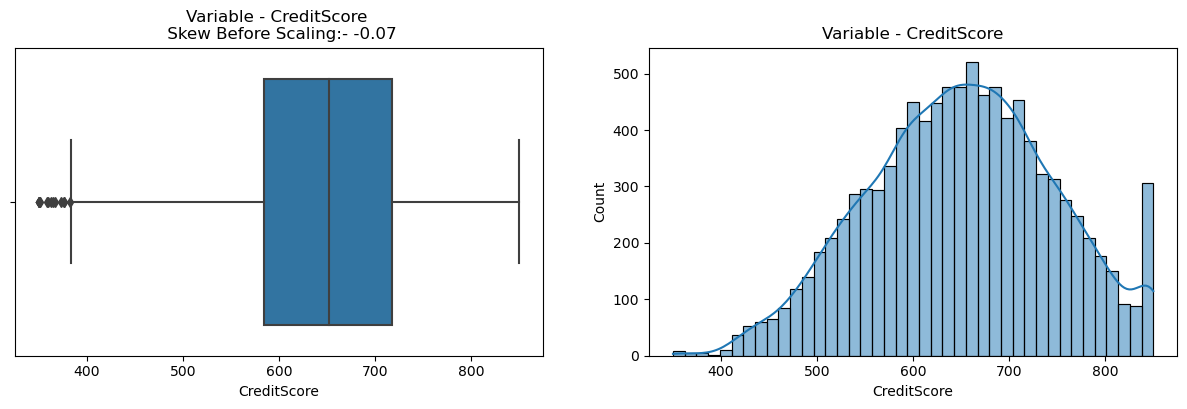

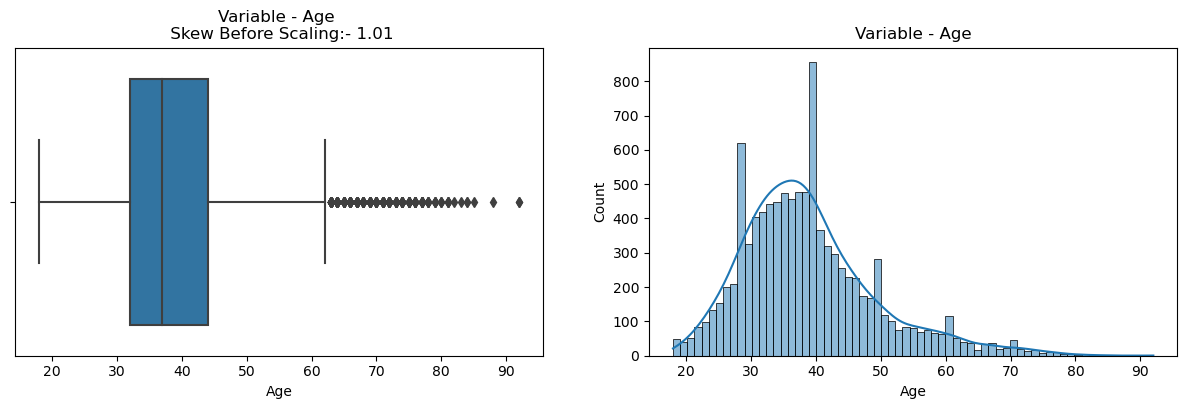

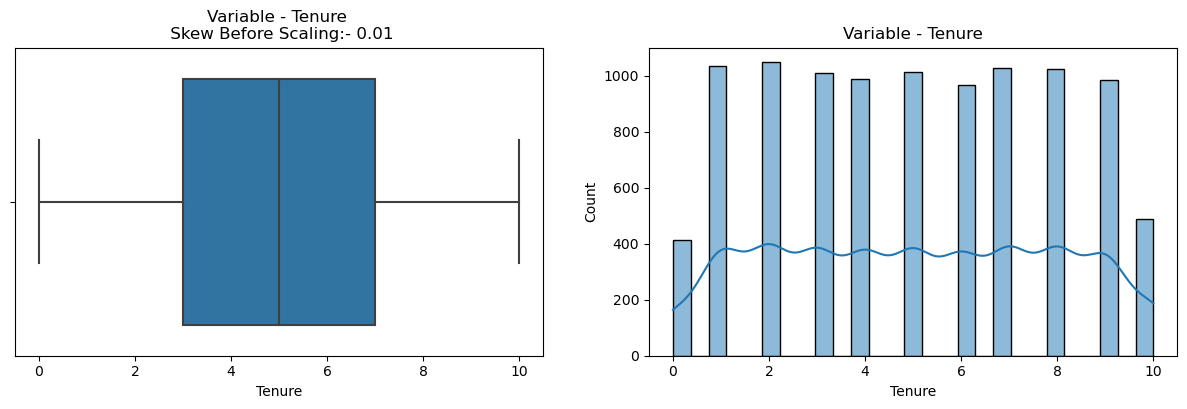

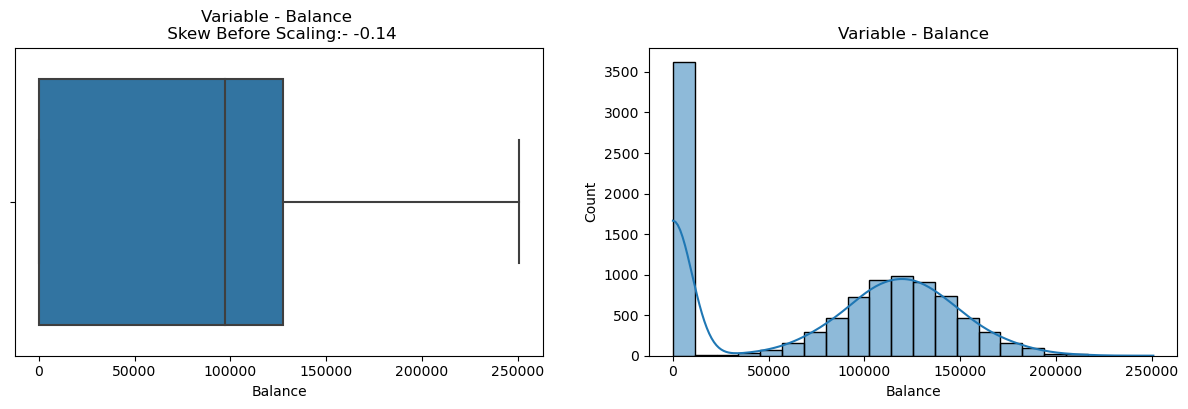

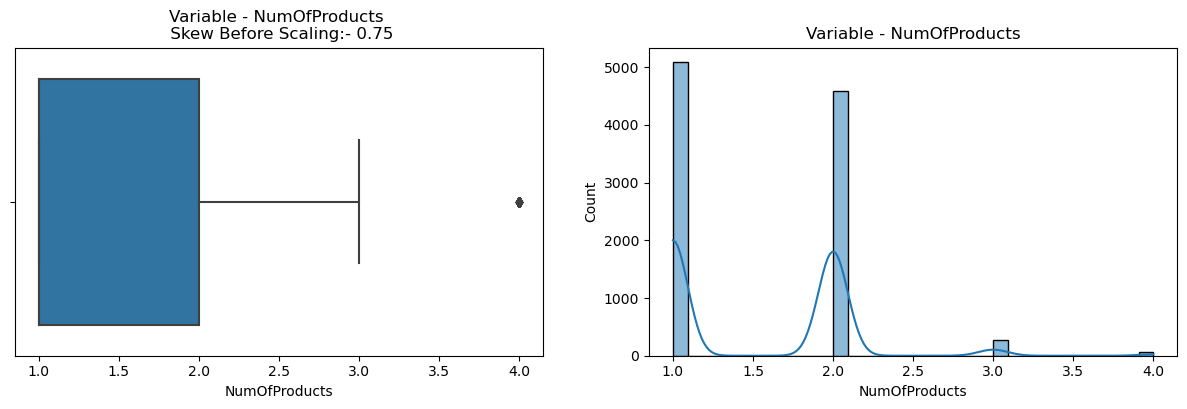

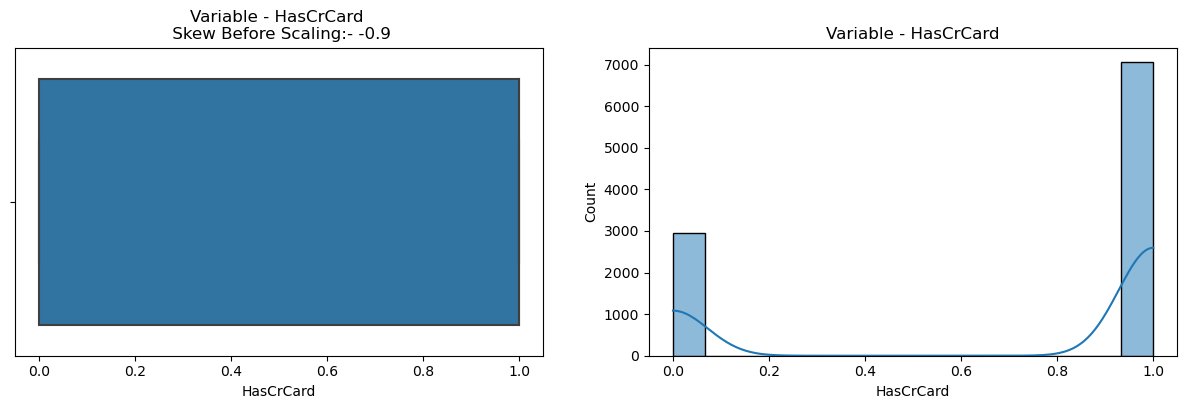

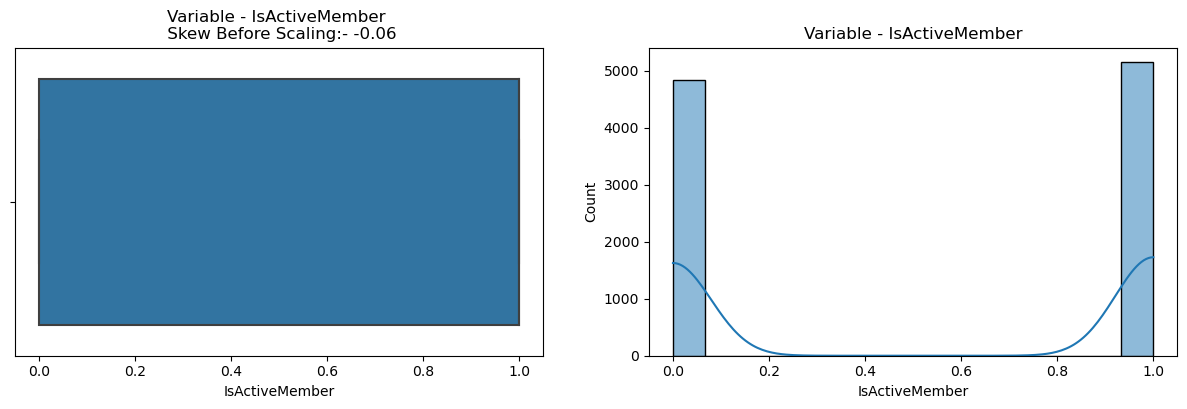

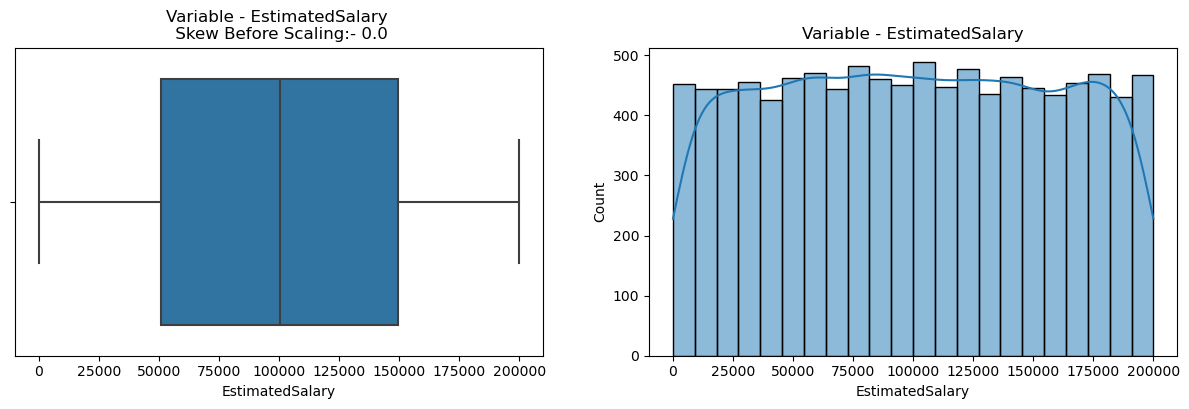

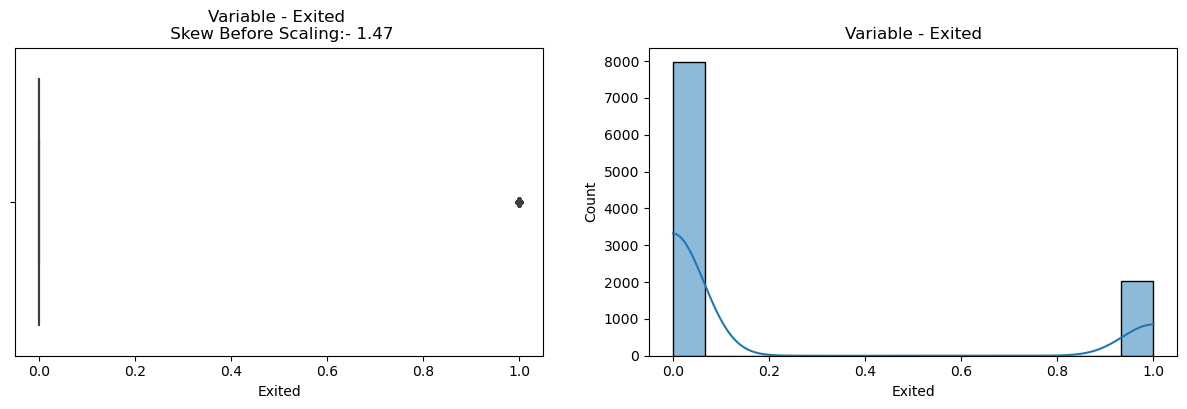

In [14]:
 for col in df.select_dtypes(exclude=['object']).columns:
    fig = plt.figure(figsize=(15,4))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    sns.boxplot(x=df[col], ax=ax1)
    ax1.title.set_text(f'Variable - {col} \n Skew Before Scaling:- {round(df[col].skew(),2)}')

    sns.histplot(data = df, x = col, kde = True)
    ax2.title.set_text(f'Variable - {col}')
    plt.show()

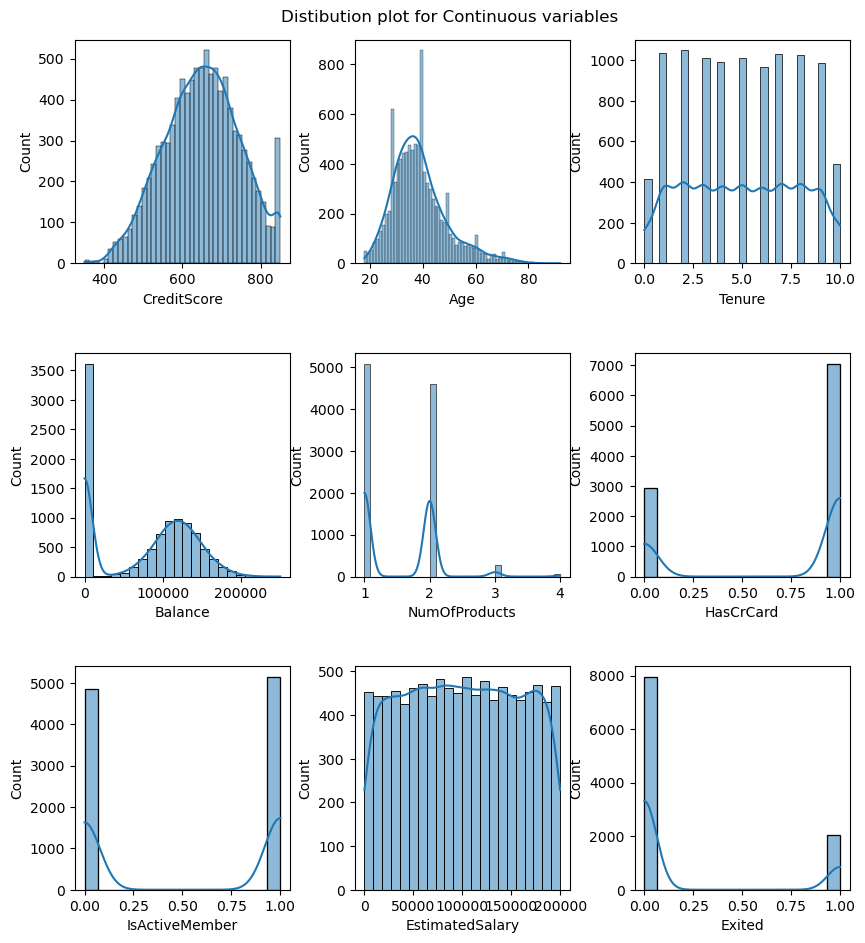

In [15]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, top=0.95, wspace= 0.3, bottom=0.1)
fig.tight_layout()
for idx, col in enumerate(df.select_dtypes(include=['int64','float64']).columns):
    ax1 = fig.add_subplot(3,3,idx+1)
    sns.histplot(data = df, x = col, kde = True)
    
plt.suptitle('Distibution plot for Continuous variables')
plt.show()

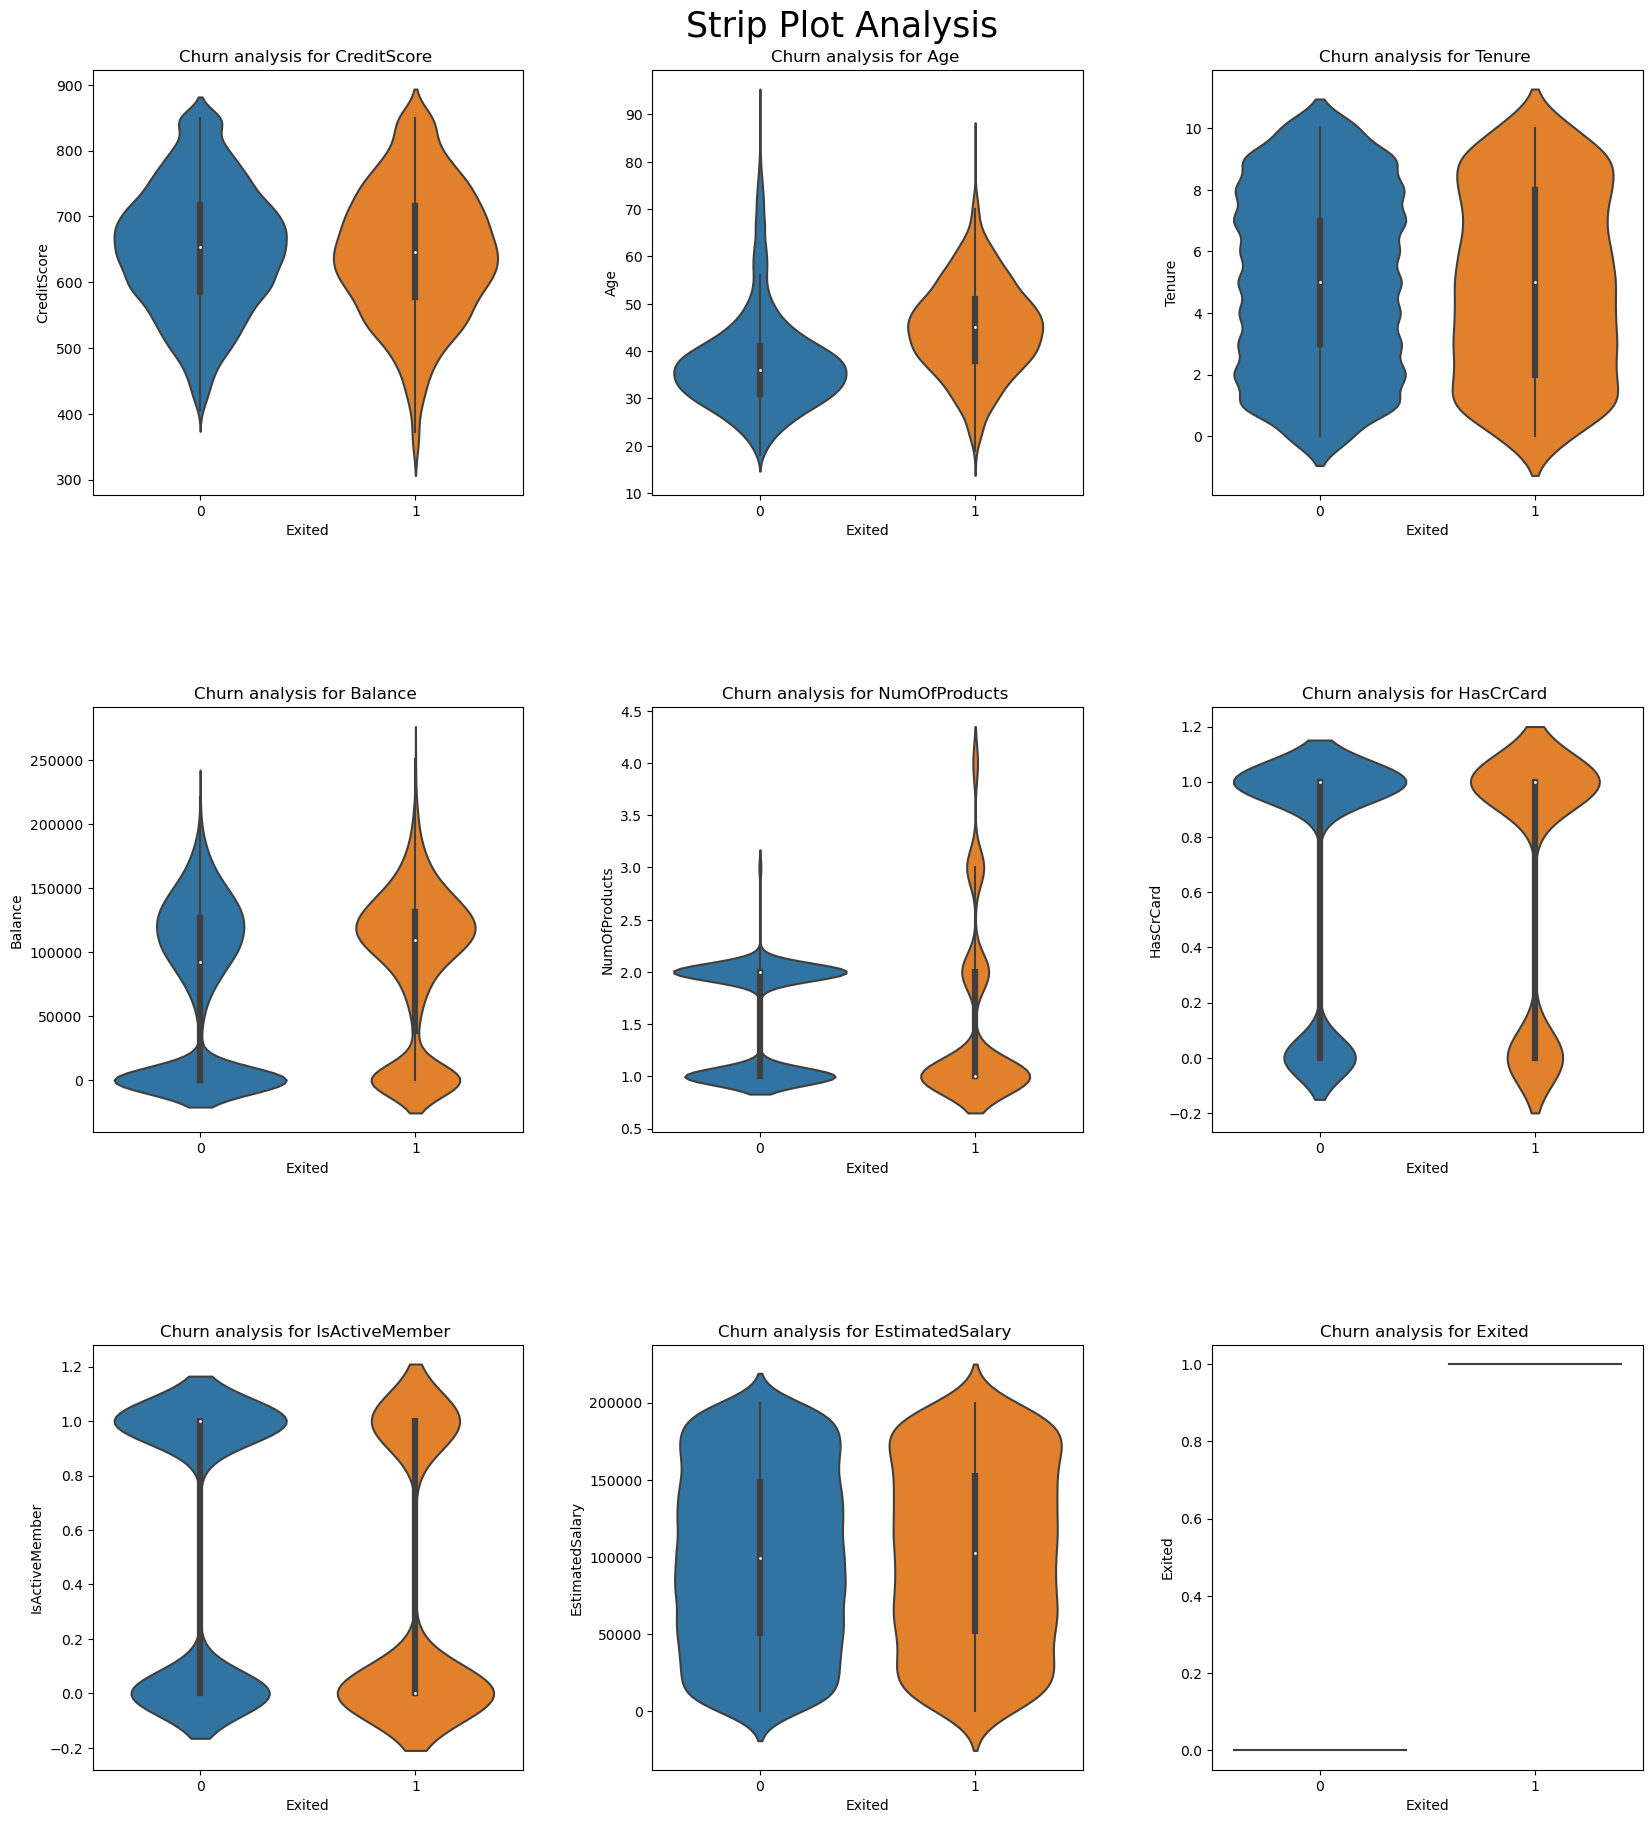

In [16]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5, top=0.95, wspace= 0.3, bottom = 0.1)
fig.tight_layout()

for idx, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax1 = fig.add_subplot(3,3,idx+1)
    sns.violinplot(y=df[col], x=df['Exited'],ax=ax1)
    ax1.title.set_text(f'Churn analysis for {col} ')
    ax1.set_ylabel(col)
    
plt.suptitle('Strip Plot Analysis', fontsize=25)
plt.show()

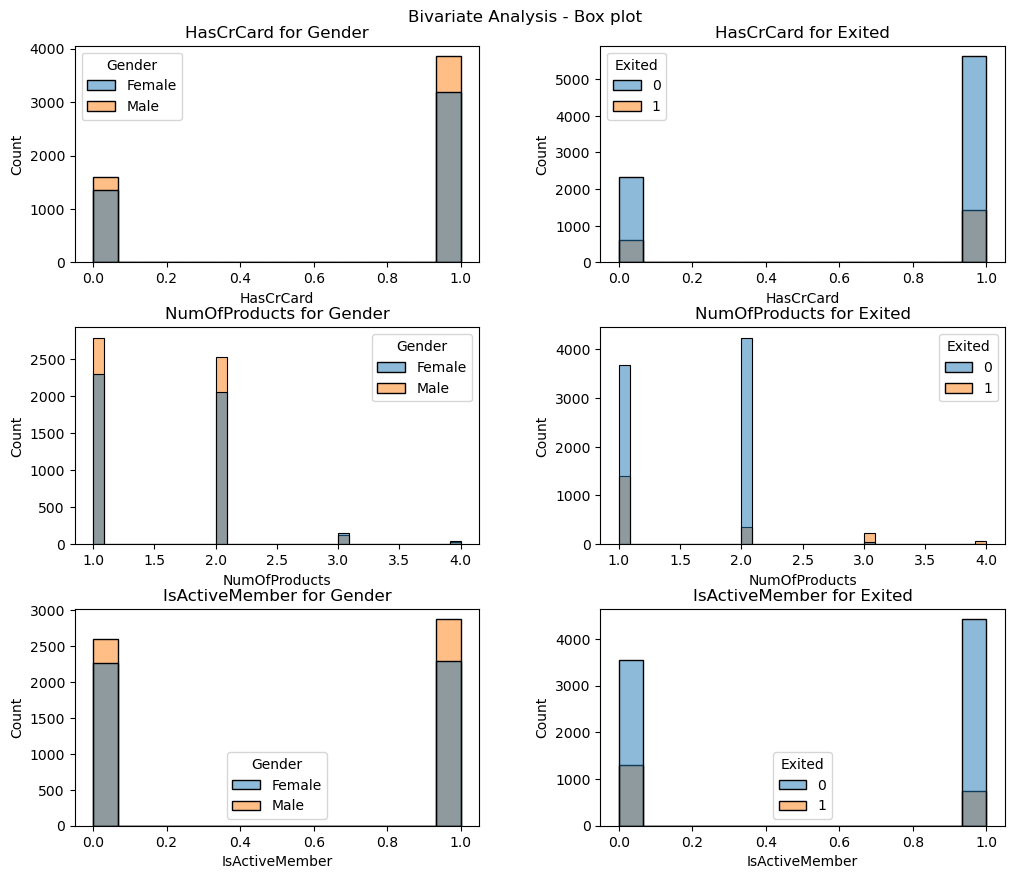

In [17]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.3, top=0.95, wspace= 0.3, bottom = 0.3)
fig.suptitle('Bivariate Analysis - Box plot', fontsize=12)
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)


sns.histplot(x=df['HasCrCard'], hue=df['Gender'], ax= ax1);
sns.histplot(data=df, x=df['HasCrCard'], hue=df['Exited'], ax= ax2);
sns.histplot(data=df, x=df['NumOfProducts'], hue=df['Gender'], ax= ax3);
sns.histplot(data=df, x=df['NumOfProducts'], hue=df['Exited'], ax= ax4);
sns.histplot(data=df, x=df['IsActiveMember'], hue=df['Gender'], ax= ax5);
sns.histplot(data=df, x=df['IsActiveMember'], hue=df['Exited'], ax= ax6);

ax1.title.set_text("HasCrCard for Gender")
ax1.tick_params(axis='x', rotation=0)
ax2.title.set_text("HasCrCard for Exited")
ax2.tick_params(axis='x', rotation=0)
ax3.title.set_text("NumOfProducts for Gender")
ax3.tick_params(axis='x', rotation=0)
ax4.title.set_text("NumOfProducts for Exited")
ax4.tick_params(axis='x', rotation=0)
ax5.title.set_text("IsActiveMember for Gender")
ax5.tick_params(axis='x', rotation=0)
ax6.title.set_text("IsActiveMember for Exited")
ax6.tick_params(axis='x', rotation=0)

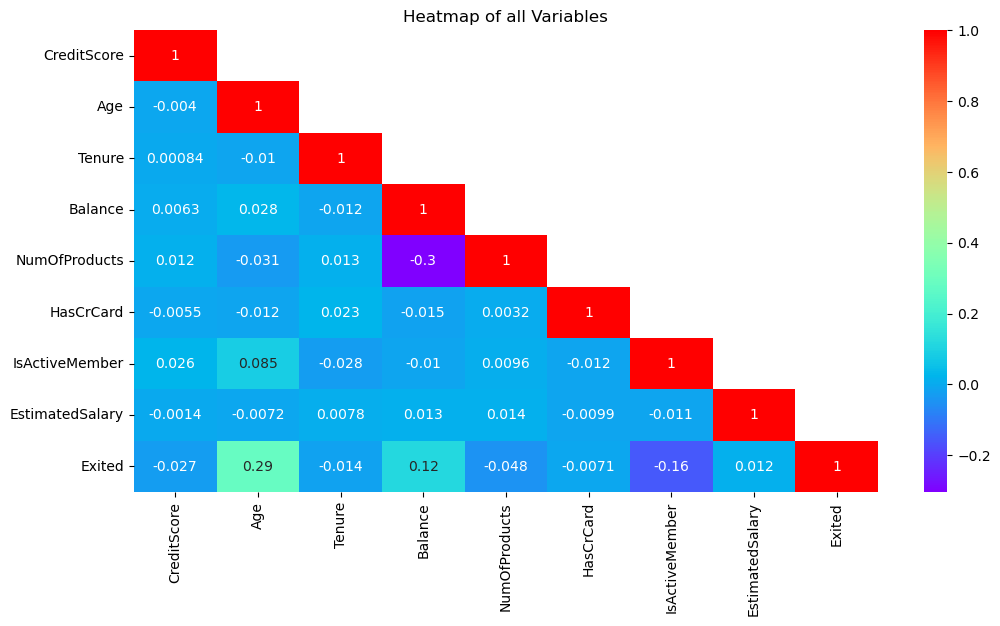

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='rainbow', mask=np.triu(df.corr(),+1))
plt.title('Heatmap of all Variables')
plt.show()

<Figure size 1200x600 with 0 Axes>

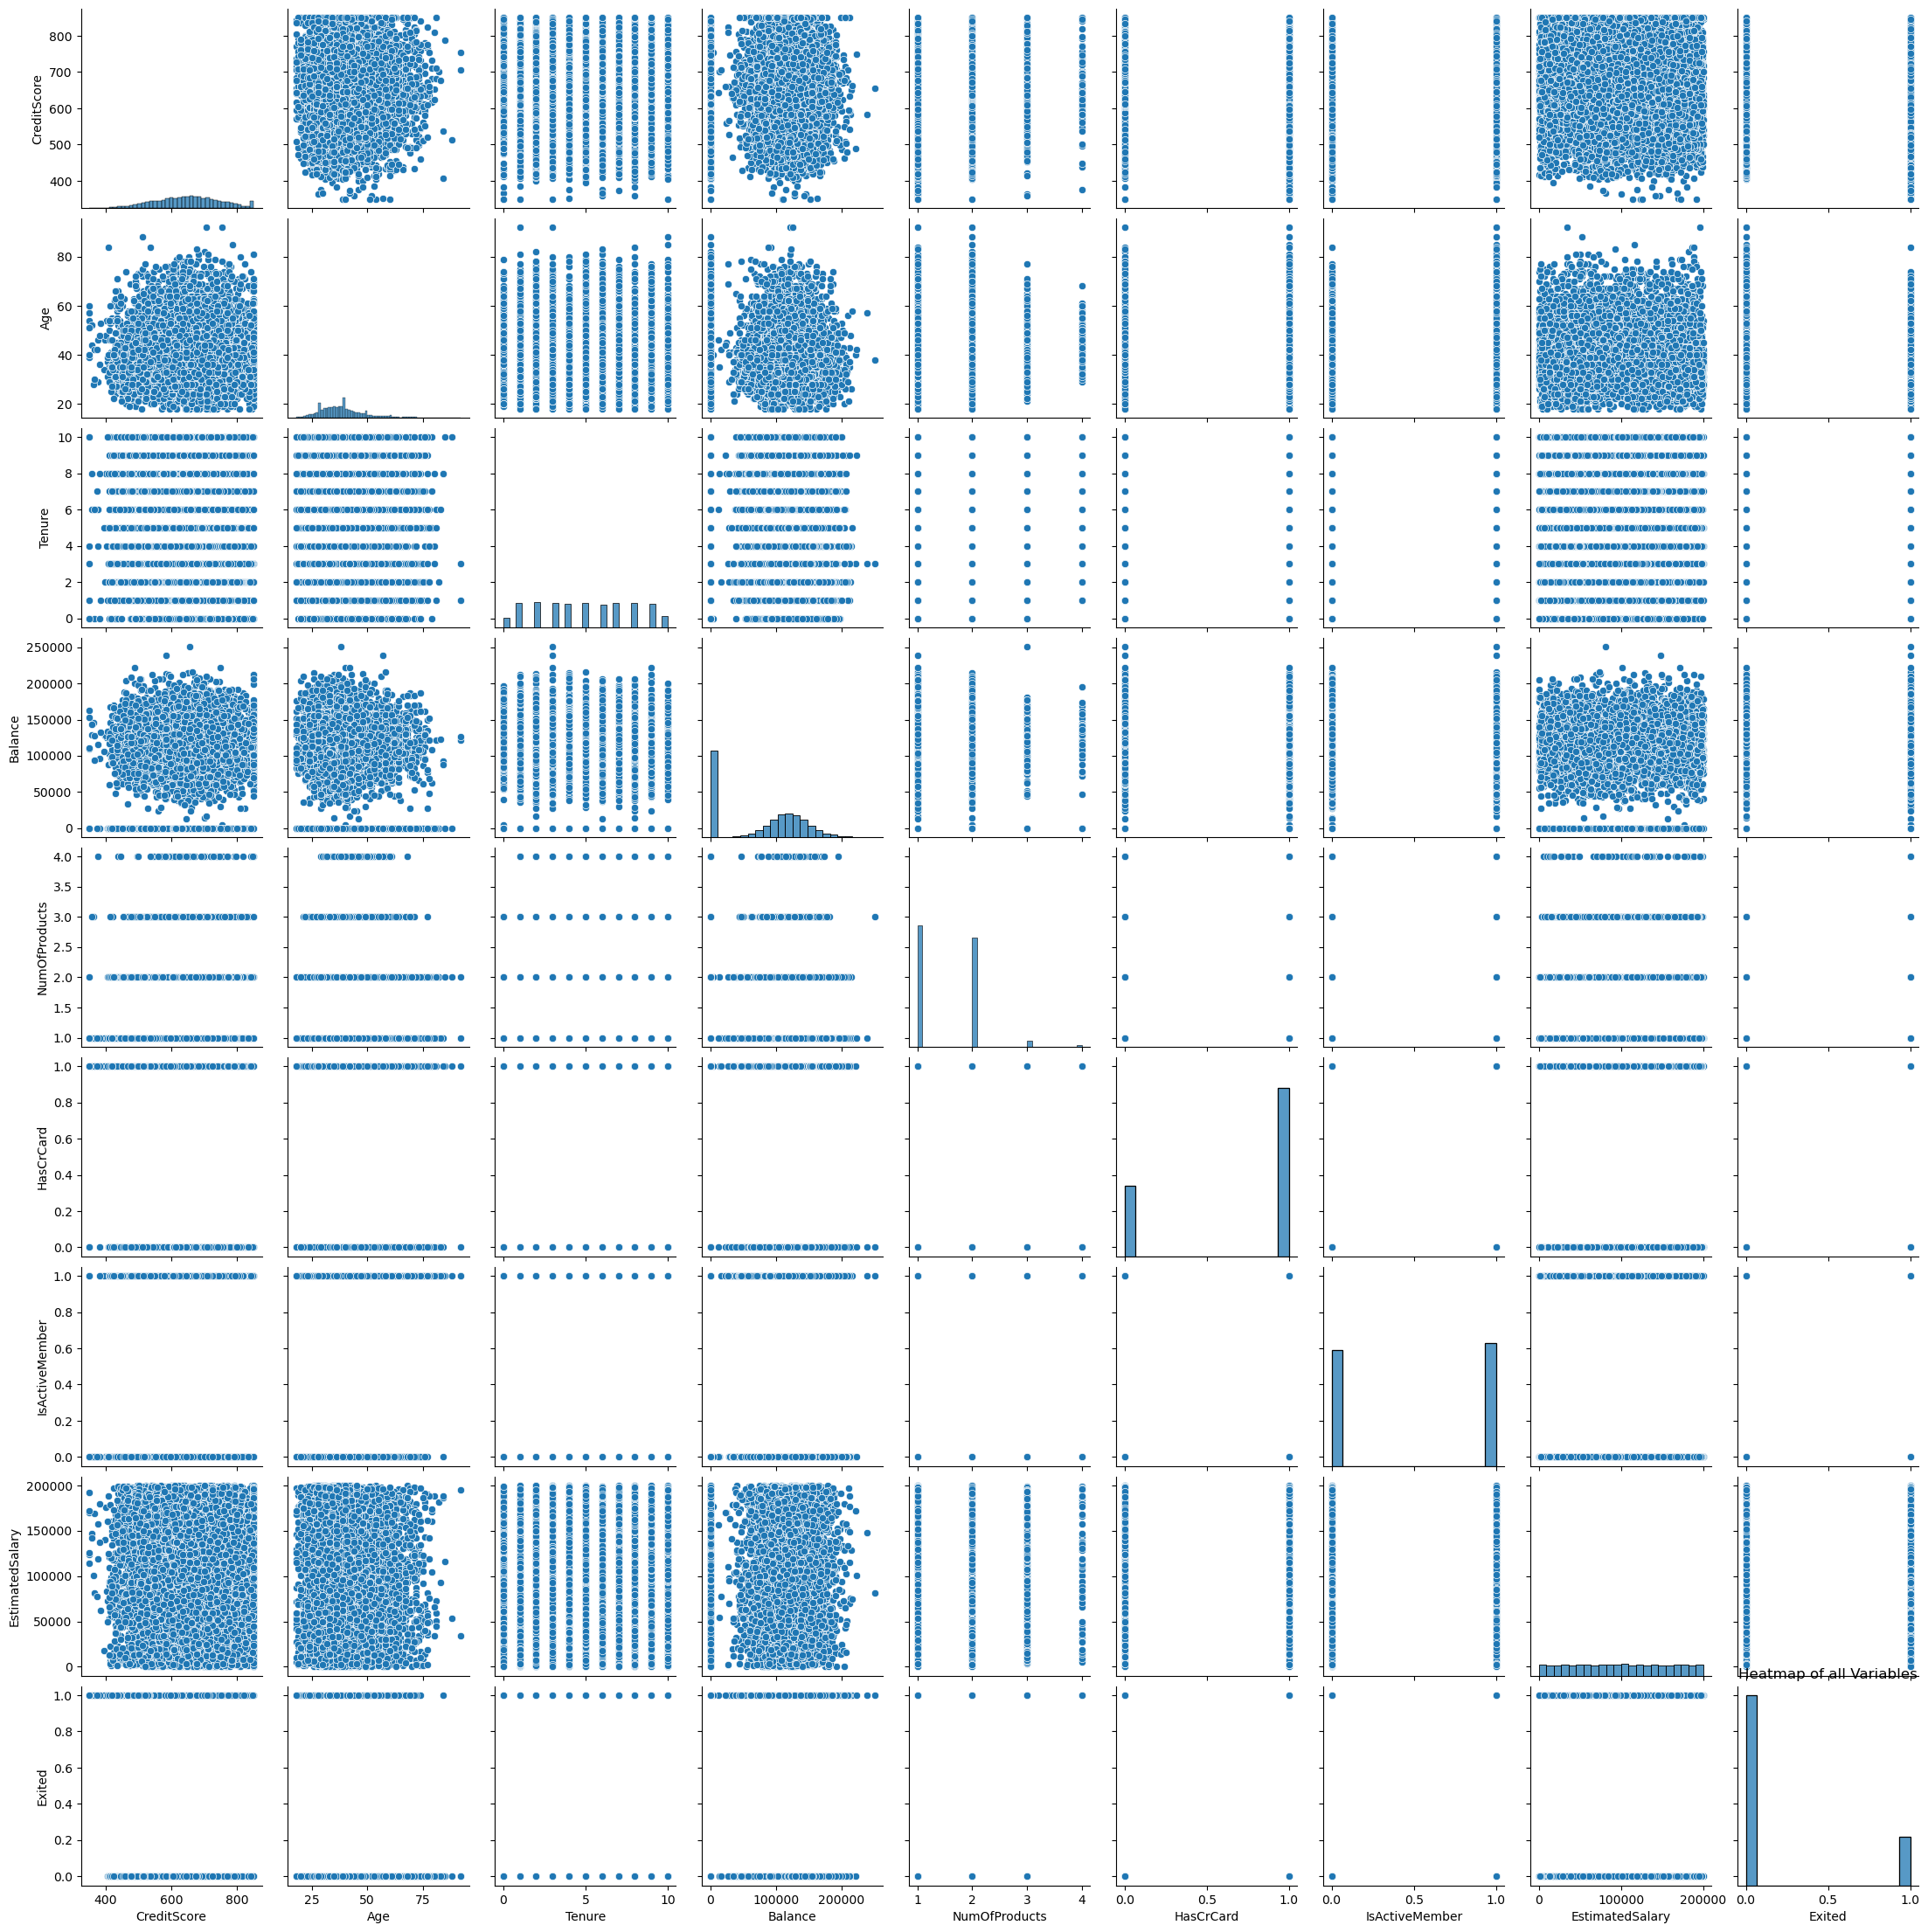

In [19]:
plt.figure(figsize=(12,6))
sns.pairplot(df)
plt.title('Heatmap of all Variables')
plt.show()

# V Data Encoding

In [20]:
gender_mapper = {'Female':0, 'Male':1}
df['Gender'] = df['Gender'].replace(gender_mapper)

geography_mapper = {'France':1, 'Germany':2, 'Spain':3}
df['Geography'] = df['Geography'].replace(geography_mapper)

df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,3,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,3,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  int64  
 3   Gender           10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 937.6+ KB


In [26]:
df.drop('Surname',axis=1,inplace=True)

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,3,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,3,0,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1
9999,792,1,0,28,4,130142.79,1,1,0,38190.78,0


In [29]:
df.to_csv('../data/AfterDataCleaning.csv', index_label= False)